In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./pd_speech_features.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Baseline Features', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9',
       ...
       'Unnamed: 745', 'Unnamed: 746', 'Unnamed: 747', 'Unnamed: 748',
       'Unnamed: 749', 'Unnamed: 750', 'Unnamed: 751', 'Unnamed: 752',
       'Unnamed: 753', 'Unnamed: 754'],
      dtype='object', length=755)

In [4]:
data.columns = data.iloc[0]
data = data.iloc[1:].reindex()

In [5]:
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [6]:
# headers = data.iloc[0]
# data = pd.DataFrame(data.values[1:], columns=headers)

In [7]:
X = data.iloc[:, 0:754].values
Y = data.iloc[:,754].values

#### Data Standardization

In [8]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


## PCA

The idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

#### Step-1 Standarization and compute covariance matrix

In [9]:
import numpy as np

X_mean = np.mean(X, axis=0)
# cv_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
# cv_mat
cv_mat = np.cov(X.T)
cv_mat

array([[ 1.0013245 , -0.13378215,  0.02670192, ..., -0.05811108,
        -0.05788379, -0.05584903],
       [-0.13378215,  1.0013245 ,  0.01018855, ...,  0.12910653,
         0.10787687,  0.10496656],
       [ 0.02670192,  0.01018855,  1.0013245 , ...,  0.04623629,
         0.03743406,  0.03964023],
       ...,
       [-0.05811108,  0.12910653,  0.04623629, ...,  1.0013245 ,
         0.94926382,  0.7861811 ],
       [-0.05788379,  0.10787687,  0.03743406, ...,  0.94926382,
         1.0013245 ,  0.86784425],
       [-0.05584903,  0.10496656,  0.03964023, ...,  0.7861811 ,
         0.86784425,  1.0013245 ]])

#### Step - 2 :  COMPUTE THE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX TO IDENTIFY THE PRINCIPAL COMPONENTS

In [10]:
eigenvalue, eigenvectors = np.linalg.eig(cv_mat)
print()
print('eigen values \n\n',eigenvalue[:5], end='\n\n')
print('eigen vectors \n\n',eigenvectors[:5], end='\n\n')


eigen values 

 [97.73833579 70.80079574 62.22641008 32.3546798  26.90448685]

eigen vectors 

 [[-7.34343947e-03 -1.16719053e-03  6.51538260e-03 ...  4.36002758e-07
  -3.40407537e-08 -9.87458857e-10]
 [ 4.50265736e-02 -4.70096509e-02 -6.29257413e-03 ... -6.26834617e-06
  -5.84242576e-07 -1.15170969e-06]
 [-1.73695965e-02 -1.04538133e-02 -5.76635105e-02 ... -6.66741942e-06
  -2.62117166e-06 -4.99220639e-07]
 [ 4.92192614e-02 -2.46931648e-03  1.58072835e-03 ... -2.12152280e-05
  -2.86188155e-06 -3.26850623e-07]
 [ 5.49956743e-02 -4.58086092e-03  4.95065904e-02 ... -7.54642844e-06
  -2.44627405e-06 -6.98435177e-07]]



#### Step-3 Primary Component Selection

In [11]:
total_eigenvalues = sum(eigenvalue)
variances = [(i / total_eigenvalues) * 100 for i in sorted(eigenvalue, reverse=True)]
variances[:50]

[12.945497649128232,
 9.377605291277419,
 8.24192307911997,
 4.285395570467566,
 3.5635144432509787,
 2.9924211171447324,
 2.508247991385918,
 2.211802240978642,
 2.032794523507782,
 1.8219685053528063,
 1.764887618922754,
 1.4932749143002992,
 1.3051535894300543,
 1.2712427480397641,
 1.267500146799637,
 1.1662274492028053,
 1.0677508285842285,
 1.0569704086230722,
 0.9484213759821511,
 0.934398601818384,
 0.866449091717293,
 0.8054486120155133,
 0.7619017160440655,
 0.7386731197986574,
 0.6675490829100305,
 0.6269640033489298,
 0.6230528890774703,
 0.6081042667178633,
 0.5863152359934458,
 0.5587794280264617,
 0.5263561269283522,
 0.521934023852453,
 0.4984897127981578,
 0.48155301409573736,
 0.4692146311775055,
 0.45737160607826094,
 0.44111597501248506,
 0.41540451473797396,
 0.40295019727398534,
 0.3806075514009977,
 0.3772762864733809,
 0.36879195041102325,
 0.3603733348132821,
 0.3503888439964802,
 0.34600638834247205,
 0.34150382897913756,
 0.3356753388836704,
 0.31494259655231

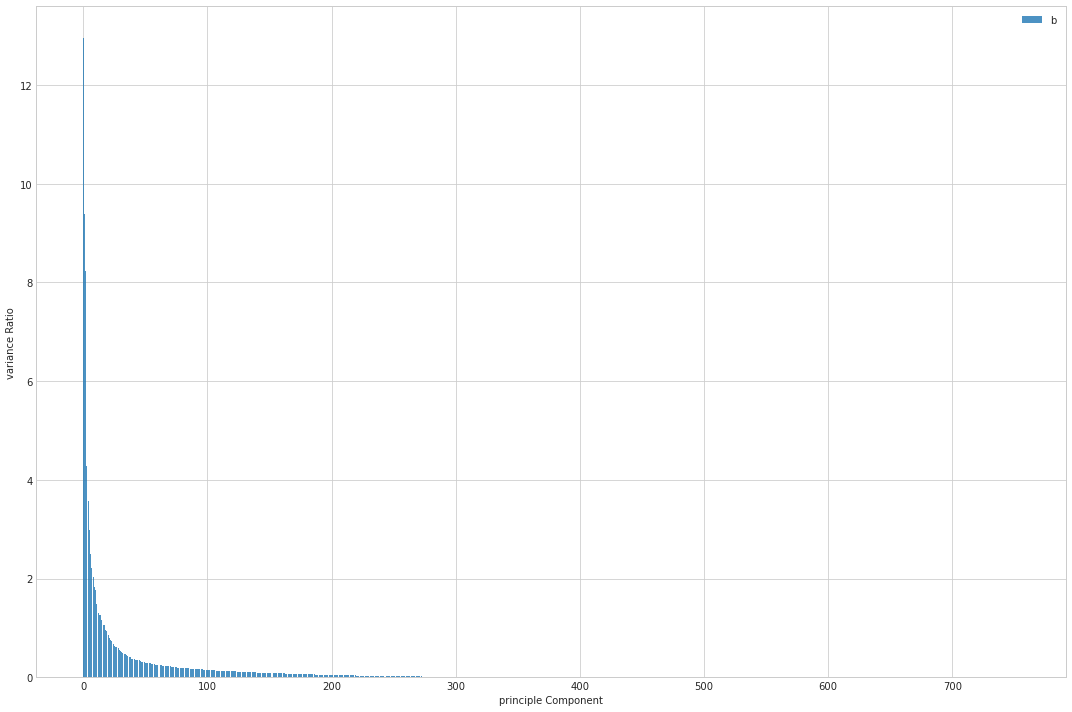

In [12]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15, 10))
    plt.bar(range(len(eigenvalue)), variances, alpha=0.8, align='center', label='Individual Component Variance')
    plt.ylabel('variance Ratio')
    plt.xlabel('principle Component')
    plt.legend('best')
    plt.tight_layout()

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [14]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [15]:
print('train shape : ', x_train.shape, end = '\n\n')
print('test shape : ', x_test.shape)

train shape :  (680, 754)

test shape :  (76, 754)


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

print('Train pca shape : ', x_train_pca.shape)
print('Test pca shape : ', x_test_pca.shape)

Train pca shape :  (680, 10)
Test pca shape :  (76, 10)


### support Vector Machine 

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)


In [18]:
classifier2 = SVC()
classifier2.fit(x_train_pca, y_train)
y_pred_pca = classifier2.predict(x_test_pca)
accuracy_pca = accuracy_score(y_pred_pca, y_test)

In [19]:
print('Accuracy for before PCA with SVM: ', accuracy, end='\n')
print('Accuracy for After PCA with SVM : ', accuracy_pca)

Accuracy for before PCA with SVM:  0.8421052631578947
Accuracy for After PCA with SVM :  0.8552631578947368


It is observed that reducing the size with PCA, that is, reducing the number of variables, has a positive effect on the success score of some machine learning classification models. It is possible to produce more effective and faster solutions by taking a small amount of data loss. Reducing dimensions with PCA will provide us with great convenience, especially in studies related to Big Data.